In [1]:
from pandas.io.parsers.readers import read_csv
import numpy as np
import pandas as pd

col= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/content/drive/MyDrive/housing_price_prediction/housing.csv', delimiter=r"\s+", names=col)

In [2]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
x = data.drop(['MEDV'], axis=1)
y = data['MEDV']

from sklearn.model_selection import train_test_split
 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.3,
                                                    random_state = 4)

In [14]:
import matplotlib.pyplot as plt

The accuracy of our model is 81.0%


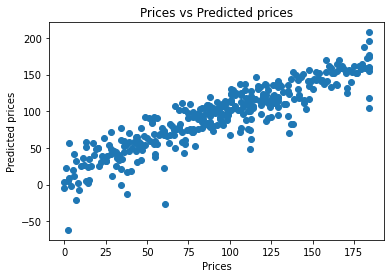

In [17]:
from sklearn.linear_model import LinearRegression
rfr = LinearRegression()
rfr.fit(xtrain, ytrain)
y_pred = rfr.predict(xtrain)

from sklearn.metrics import r2_score
score = r2_score(ytrain,y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
plt.scatter(ytrain, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [7]:
from sklearn import metrics

print('Adjusted R^2:',1 - (1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(ytrain, y_pred))
print('MSE:',metrics.mean_squared_error(ytrain, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


The accuracy of our model is 98.0%


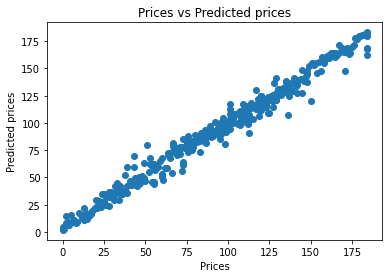

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
y_pred = rfr.predict(xtrain)

from sklearn.metrics import r2_score
score = r2_score(ytrain,y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
plt.scatter(ytrain, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [9]:
from sklearn import metrics

print('Adjusted R^2:',1 - (1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(ytrain, y_pred))
print('MSE:',metrics.mean_squared_error(ytrain, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

Adjusted R^2: 0.9765526615723028
MAE: 0.8638418079096042
MSE: 1.6999042768361594
RMSE: 1.303803772366133


The accuracy of our model is 30.0%


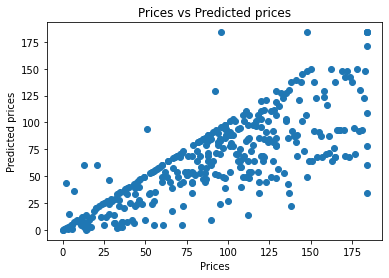

The accuracy of our model is 100.0%


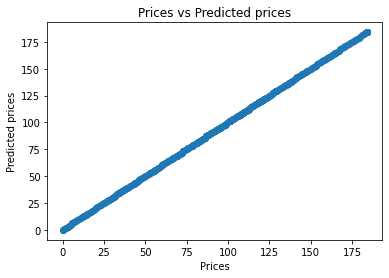

The accuracy of our model is 100.0%


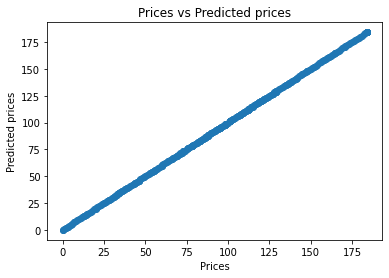

In [13]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
ytrain = lab.fit_transform(ytrain)

classifiers = [KNeighborsClassifier(),
               DecisionTreeRegressor(),
              XGBRegressor()
               ]
for cls in classifiers:
    cls.fit(xtrain, ytrain)
    y_pred = cls.predict(xtrain)
    score = r2_score(ytrain,y_pred)
    print("The accuracy of our model is {}%".format(round(score, 2) *100))
    plt.scatter(ytrain, y_pred)
    plt.xlabel("Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices")
    plt.show()
    

In [19]:
git clone ~/MyDrive/housing_price_prediction.git

SyntaxError: ignored